In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from tree.base import DecisionTree
from metrics import *

In [2]:
np.random.seed(42)
num_average_time = 100  # Number of times to run each experiment to calculate the average values

In [4]:
# Function to create fake data (take inspiration from usage.py)

def create_fake_data(N, M, binary=True):
    if binary:
        X = np.random.randint(2, size=(N, M))  # Binary features
    else:
        X = np.random.randn(N, M)  # Real-valued features

    y = np.random.randint(2, size=N)  # Binary target variable
    return pd.DataFrame(X), pd.Series(y)

In [6]:
# Function to calculate average time (and std) taken by fit() and predict() for different N and P for 4 different cases of DTs

def measure_time(tree, X, y):
    """
    Function to measure the time
    """
    for criteria in ["information_gain", "gini_index"]:
        tree = DecisionTree(criterion=criteria)  # Split based on Inf. Gain
        start_train = time.time()
        tree.fit(X, y)
        end_train = time.time()
    
        start_predict = time.time()
        y_hat = tree.predict(X)
        end_predict = time.time()
        
        train_time = end_train - start_train
        predict_time = end_predict - start_predict
        return train_time, predict_time
    
def experiment(tree_type, N_values, M_values, iterations=num_average_time):
    """
    Run the experiment for different values of N and M.
    tree_type: 'DIDO', 'RIRO', 'RIDO', 'DIRO'
    """
    training_times = []
    prediction_times = []
    
    for N in N_values:
        for M in M_values:
            train_times=[]
            predict_times=[]
            for _ in range(iterations):
                X, y = create_fake_data(N, M, binary=(tree_type in ['DIDO', 'DIRO']))
                
                tree = DecisionTree(criterion='information_gain', max_depth=5)  # Replace with appropriate criterion for your implementation
                
                train_time, predict_time = measure_time(tree, X, y)
                train_times.append((N, M, train_time))
                predict_times.append((N, M, predict_time))

            # Calculate the mean time over iterations
            mean_train_time = np.mean(train_times)
            mean_predict_time = np.mean(predict_times)
            training_times.append((N, M, mean_train_time))
            prediction_times.append((N, M, mean_predict_time))
    
    return training_times, prediction_times

In [7]:
# Function to plot the results

def plot(results, title):

    N_values, M_values, times = zip(*results)
    N_values = np.array(N_values)
    M_values = np.array(M_values)
    times = np.array(times)

    plt.figure(figsize=(10, 6))
    plt.scatter(N_values, times, c=M_values, cmap='viridis', alpha=0.7)
    plt.colorbar(label='Number of Features (M)')
    plt.xlabel('Number of Samples (N)')
    plt.ylabel('Time (seconds)')
    plt.title(title)
    plt.grid('on')
    plt.show()

Running experiment for DIDO...

[(10, 5, 0.10384058952331543), (10, 10, 0.16262435913085938), (10, 15, 0.26996922492980957), (10, 20, 0.29209280014038086), (10, 25, 0.18181705474853516), (20, 5, 0.24082422256469727), (20, 10, 0.44350624084472656), (20, 15, 0.628253698348999), (20, 20, 0.8793160915374756), (20, 25, 0.8666284084320068), (30, 5, 0.33351588249206543), (30, 10, 0.799699068069458), (30, 15, 1.2166378498077393), (30, 20, 1.595191240310669), (30, 25, 1.8407232761383057), (40, 5, 0.4731180667877197), (40, 10, 1.0109024047851562), (40, 15, 1.5991144180297852), (40, 20, 2.13439679145813), (40, 25, 2.5657312870025635), (50, 5, 0.6249532699584961), (50, 10, 1.5503499507904053), (50, 15, 2.075157642364502), (50, 20, 2.474893569946289), (50, 25, 3.5687520503997803)] [(10, 5, 0.008538484573364258), (10, 10, 0.0), (10, 15, 0.0), (10, 20, 0.004122257232666016), (10, 25, 0.0), (20, 5, 0.005517005920410156), (20, 10, 0.0), (20, 15, 0.0), (20, 20, 0.0), (20, 25, 0.0), (30, 5, 0.0), (30, 10

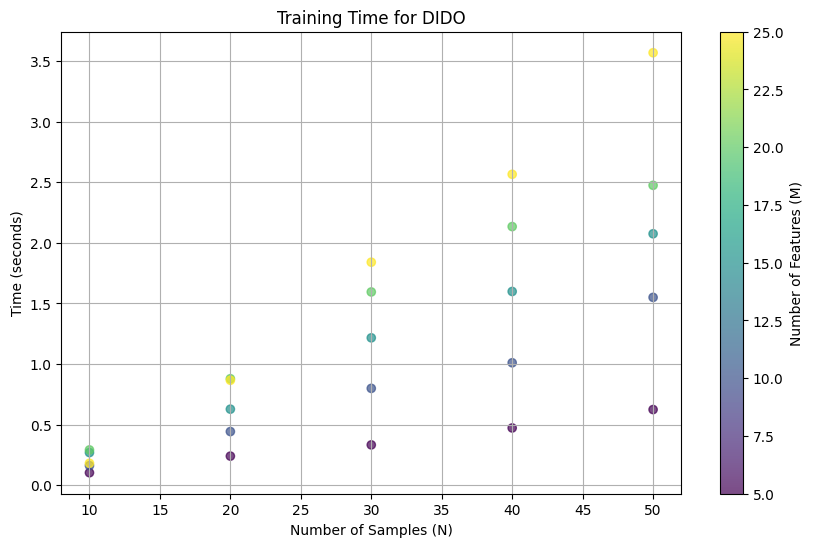

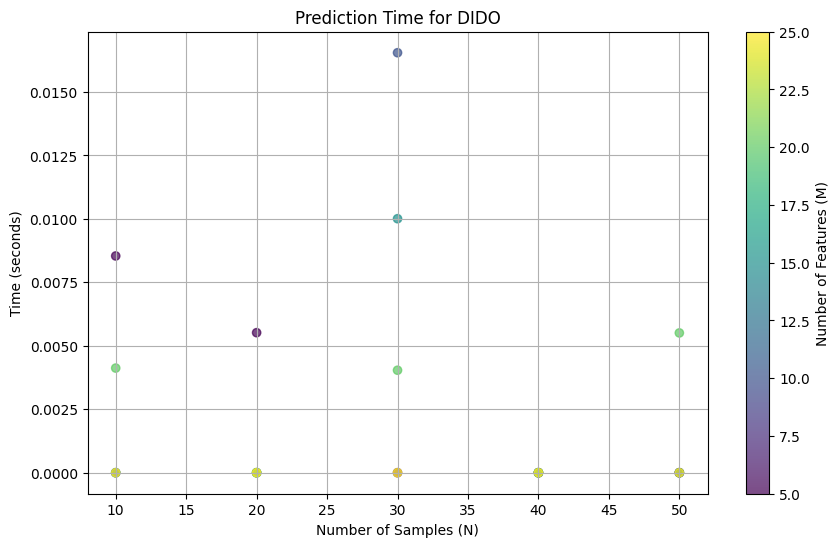

Running experiment for RIRO...

[(10, 5, 0.10838556289672852), (10, 10, 0.16109800338745117), (10, 15, 0.1947023868560791), (10, 20, 0.2942066192626953), (10, 25, 0.33873867988586426), (20, 5, 0.19684910774230957), (20, 10, 0.42093801498413086), (20, 15, 0.4163243770599365), (20, 20, 1.0324292182922363), (20, 25, 1.0205836296081543), (30, 5, 0.5254726409912109), (30, 10, 0.8874590396881104), (30, 15, 1.0285851955413818), (30, 20, 2.080615520477295), (30, 25, 2.2930078506469727), (40, 5, 0.6846146583557129), (40, 10, 1.4272944927215576), (40, 15, 1.7974746227264404), (40, 20, 3.0915322303771973), (40, 25, 2.1018617153167725), (50, 5, 0.9723834991455078), (50, 10, 1.8347628116607666), (50, 15, 2.50537371635437), (50, 20, 3.386413812637329), (50, 25, 4.33094334602356)] [(10, 5, 0.0), (10, 10, 0.0), (10, 15, 0.0), (10, 20, 0.0), (10, 25, 0.0), (20, 5, 0.0), (20, 10, 0.0), (20, 15, 0.0), (20, 20, 0.0010039806365966797), (20, 25, 0.0), (30, 5, 0.0), (30, 10, 0.0), (30, 15, 0.0009973049163818

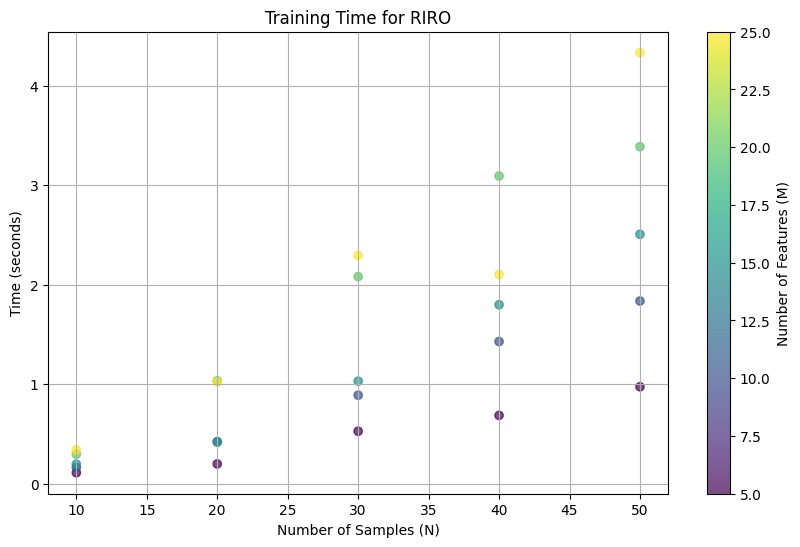

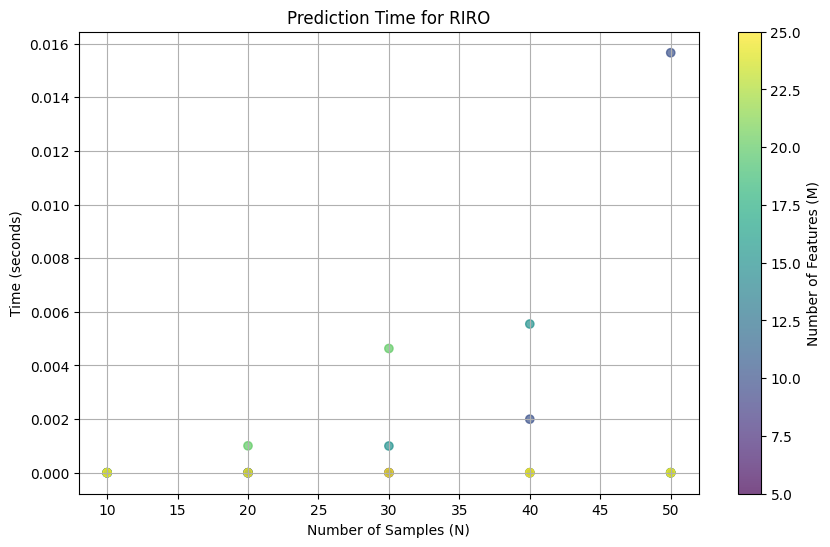

Running experiment for RIDO...

[(10, 5, 0.07733535766601562), (10, 10, 0.12633967399597168), (10, 15, 0.23351573944091797), (10, 20, 0.17114543914794922), (10, 25, 0.31207966804504395), (20, 5, 0.36700010299682617), (20, 10, 0.44142746925354004), (20, 15, 0.5772085189819336), (20, 20, 0.8278472423553467), (20, 25, 0.8665258884429932), (30, 5, 0.35414624214172363), (30, 10, 0.8665006160736084), (30, 15, 1.1979873180389404), (30, 20, 1.238586187362671), (30, 25, 1.6803715229034424), (40, 5, 0.6759486198425293), (40, 10, 1.5421183109283447), (40, 15, 1.6308581829071045), (40, 20, 2.3408586978912354), (40, 25, 3.7262682914733887), (50, 5, 1.1380820274353027), (50, 10, 1.6327242851257324), (50, 15, 2.9256961345672607), (50, 20, 3.0881733894348145), (50, 25, 3.955686569213867)] [(10, 5, 0.0009958744049072266), (10, 10, 0.0), (10, 15, 0.015614748001098633), (10, 20, 0.0), (10, 25, 0.0), (20, 5, 0.0), (20, 10, 0.0010731220245361328), (20, 15, 0.0), (20, 20, 0.015659332275390625), (20, 25, 0.0

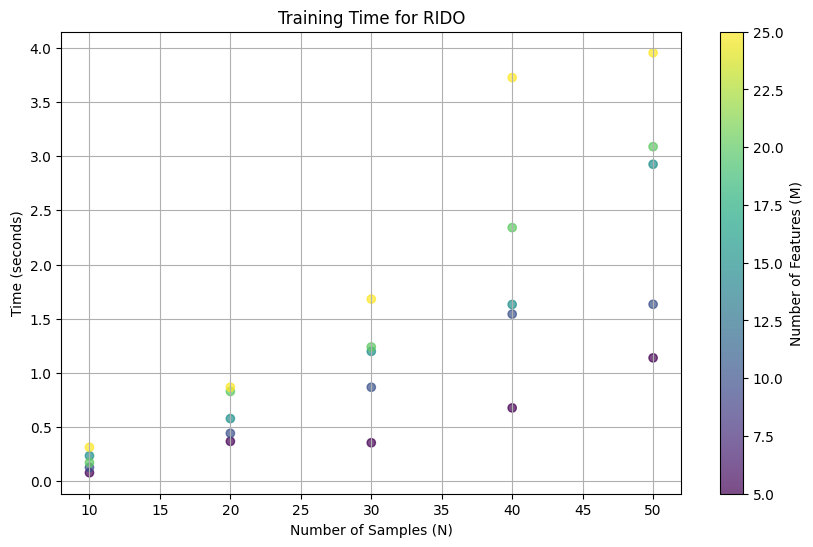

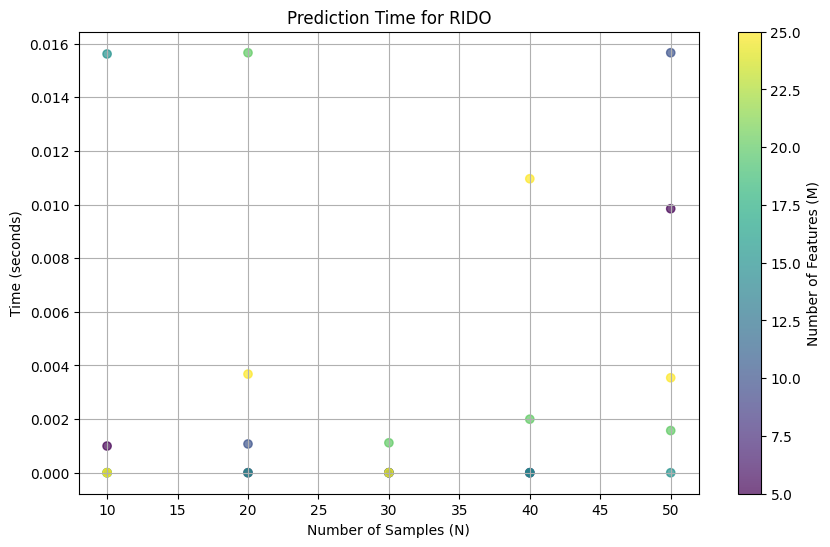

Running experiment for DIRO...

[(10, 5, 0.08227992057800293), (10, 10, 0.13045549392700195), (10, 15, 0.12801074981689453), (10, 20, 0.21208930015563965), (10, 25, 0.3799738883972168), (20, 5, 0.203873872756958), (20, 10, 0.41700029373168945), (20, 15, 0.548102855682373), (20, 20, 0.6499230861663818), (20, 25, 0.8013095855712891), (30, 5, 0.36942458152770996), (30, 10, 0.7263047695159912), (30, 15, 1.1027865409851074), (30, 20, 1.497666835784912), (30, 25, 1.5799009799957275), (40, 5, 0.4803602695465088), (40, 10, 0.9925987720489502), (40, 15, 1.584589958190918), (40, 20, 2.185944080352783), (40, 25, 2.448590040206909), (50, 5, 0.5714921951293945), (50, 10, 1.2752039432525635), (50, 15, 2.25303316116333), (50, 20, 2.730045795440674), (50, 25, 3.2343828678131104)] [(10, 5, 0.0), (10, 10, 0.0), (10, 15, 0.0), (10, 20, 0.0), (10, 25, 0.0), (20, 5, 0.0), (20, 10, 0.0), (20, 15, 0.0), (20, 20, 0.015612125396728516), (20, 25, 0.016025304794311523), (30, 5, 0.0018458366394042969), (30, 10, 0

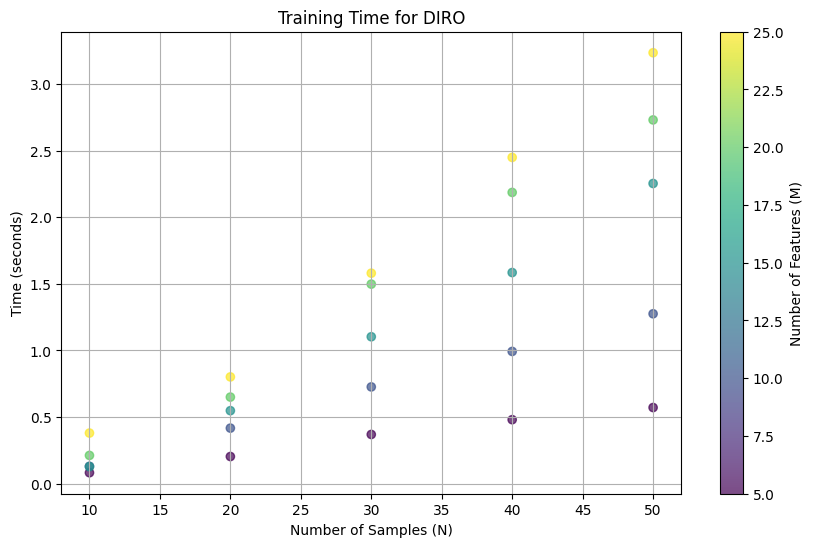

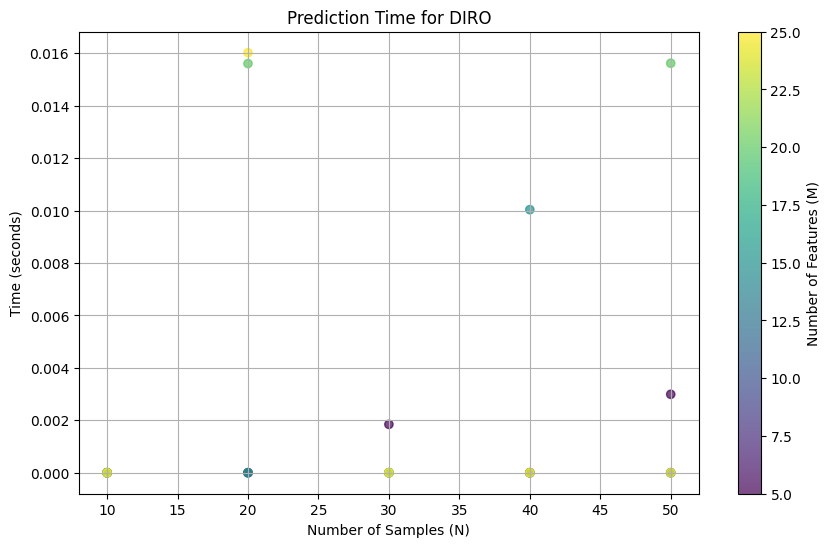

In [10]:
# Run the functions, Learn the DTs and Show the results/plots

N_values = [10, 20, 30, 40, 50]  # Varying number of samples
M_values = [5, 10, 15, 20, 25]          # Varying number of features

cases = ['DIDO', 'RIRO', 'RIDO', 'DIRO']
for case in cases:
    print(f"Running experiment for {case}...")
    train_results, predict_results = experiment(case, N_values, M_values)
    print()
    print(train_results, predict_results)
    print()
    plot(train_results, f'Training Time for {case}')
    plot(predict_results, f'Prediction Time for {case}')